# Завдання 4. Рівняння Пуассона, яке задане у полярній системі координат (осесиметричний випадок)

Загальний вигляд рівняння:
$$
\Delta u(r)=\frac 1r \frac{d}{dr}\left(r\frac{du}{dr}\right)=f(r)
$$

Після дискретизації:
$$
\left(r_i - \frac{h}{2}\right)u_{i-1} + \left(r_i + \frac{h}{2}\right)u_{i+1} - 2r_i u_i   = h^2 r_i f_i
$$

Задача 4.8

$
f(r)=r^3,\quad r\in[0.9,1.9]
$

$
u(0.9)+u'(0.9)=0,\ \ u(1.9)=1.
$

In [1]:
from solver import thomas 
import numpy as np
import matplotlib.pyplot as plt

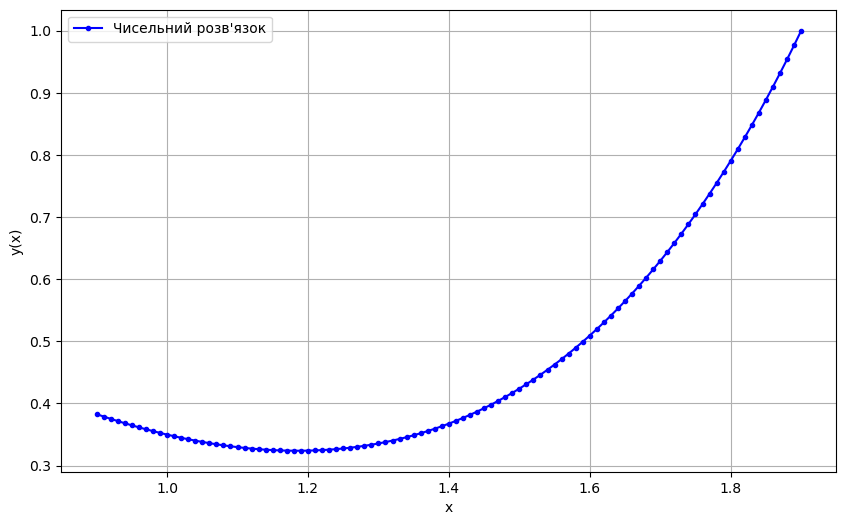

In [2]:
# --- 1. Налаштування параметрів ---
N = 100  # Кількість точок сітки
rmin, rmax = 0.9, 1.9
r = np.linspace(rmin, rmax, N + 1)
h = (rmax - rmin) / N

# --- 2. Формування коефіцієнтів тридіагональної системи ---
a = np.zeros(N + 1)  # піддіагональ (a[0] не використовується)
b = np.zeros(N + 1)  # головна діагональ
c = np.zeros(N + 1)  # наддіагональ (c[-1] не використовується)
d = np.zeros(N + 1)  # права частина

# --- 3. Заповнення рівнянь для внутрішніх точок ---
i = np.arange(1, N)
a[i] = r[i] - h/2.0
b[i] = -2*r[i]
c[i] = r[i] + h/2.0
d[i] = h**2*r[i]**4

# --- 4. Застосування граничних умов ---
# Ліва межа
b[0] = 1.0 - 1.0/h
c[0] = 1.0/h
d[0] = 0.0

# Права межа
a[N] = 0.0
b[N] = 1.0
c[N] = 0.0
d[N] = 1.0

# --- 5. Розв'язання системи методом прогонки ---
u = thomas(a.copy(), b.copy(), c.copy(), d.copy())

# --- 6. Візуалізація результату ---
plt.figure(figsize=(10, 6))
plt.plot(r, u, label="Чисельний розв'язок", color='blue', marker='o', markersize=3, linestyle='-')
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.legend()
plt.show()
